# Achievement 4 Customer Profiles and Visualizations

## Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

## 01 Importing Libraries and Data 

In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy 

In [2]:
path = r'/Users/brookecoffey/10-07-2023 Instacart Basket Analysis'

In [3]:
df_final_private_excluded = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'df_final_private_excluded.pkl'))

In [4]:
# Checking initial shape 
df_final_private_excluded.shape

(29266394, 33)

## 02 Merging Department Data 

In [5]:
df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'),index_col = False)

In [6]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [7]:
# renaming Unnamed column to merge with dataframe
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [8]:
# merging department with the most recent dataframe 
df_final_dept = df_final_private_excluded.merge(df_dept, on='department_id')

In [9]:
# Checking shape of merged dataframe
df_final_dept.shape

(29266394, 34)

## 03 Creating Age Profiles

In [10]:
df_final_dept.loc[df_final_dept['age'] >= 60 , 'age_group'] = 'Senior'
df_final_dept.loc[(df_final_dept['age'] >=35) & (df_final_dept['age'] < 60), 'age_group'] = 'Middle Aged'
df_final_dept.loc[df_final_dept['age'] < 35 , 'age_group'] = 'Young Adult'

In [11]:
# Getting Frequency of Groups 
df_final_dept['age_group'].value_counts()

Middle Aged    11493613
Senior          9997411
Young Adult     7775370
Name: age_group, dtype: int64

### 03a Create an appropriate visualization to show the distribution of profiles

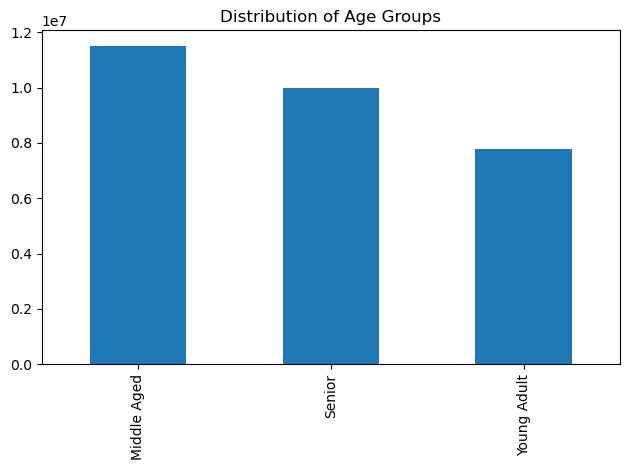

In [75]:
age_group_barchart = df_final_dept['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age Groups')
plt.tight_layout()

In [77]:
# Exporting visualization 
age_group_barchart.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_barchart.png'))

### 03b Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [14]:
df_age_group_stats = df_final_dept.groupby('age_group').agg({'days_since_prior_order' : ['max', 'min', 'mean'], 'prices' :['max', 'min', 'mean']})
df_age_group_stats

days_since_prior_order                 prices               
                               max  min       mean    max  min      mean
age_group                                                               
Middle Aged                   30.0  0.0  10.820230   25.0  1.0  7.791247
Senior                        30.0  0.0  10.799681   25.0  1.0  7.795778
Young Adult                   30.0  0.0  10.835683   25.0  1.0  7.786629

### 03c Compare your customer profiles with regions and departments.

In [15]:
# Using a crosstab to see relationship between region and age group 
regional_age_group_crosstab = pd.crosstab(df_final_dept['region'], df_final_dept['age_group'], dropna = False)
regional_age_group_crosstab

age_group,Middle Aged,Senior,Young Adult
region,,,
Midwest,2741524,2319061,1798111
Northeast,1994277,1793356,1389647
South,3803860,3329928,2611582
West,2953952,2555066,1976030


In [16]:
# Sorting results 
regional_age_group_crosstab = regional_age_group_crosstab.sort_values(by=['Middle Aged'], ascending = False)

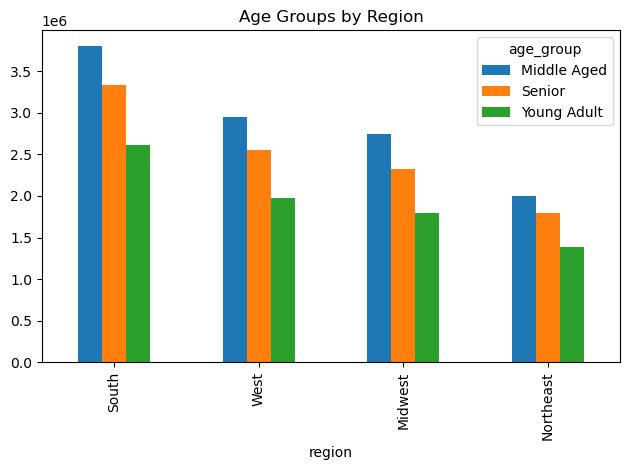

In [82]:
# Creating a visualization of the above dataframe 
regional_age_viz = regional_age_group_crosstab.plot.bar()
plt.title('Age Groups by Region')
plt.tight_layout()

In [84]:
# Exporting Visualization 
regional_age_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_by_region.png'))

In [18]:
# Comparing age profile by department 
age_group_dept_crosstab = pd.crosstab(df_final_dept['department'], df_final_dept['age_group'], dropna = False)
age_group_dept_crosstab

age_group,Middle Aged,Senior,Young Adult
department,,,
alcohol,54191,44873,38878
babies,155519,131442,100778
bakery,416668,361256,281902
beverages,956109,836098,638450
breakfast,247632,215122,170001
bulk,12214,10787,8559
canned goods,376235,325093,255504
dairy eggs,1917330,1665545,1304721
deli,372871,324768,251160


In [19]:
# sorting results 
age_group_dept_crosstab = age_group_dept_crosstab.sort_values(by=['Middle Aged'], ascending=True)

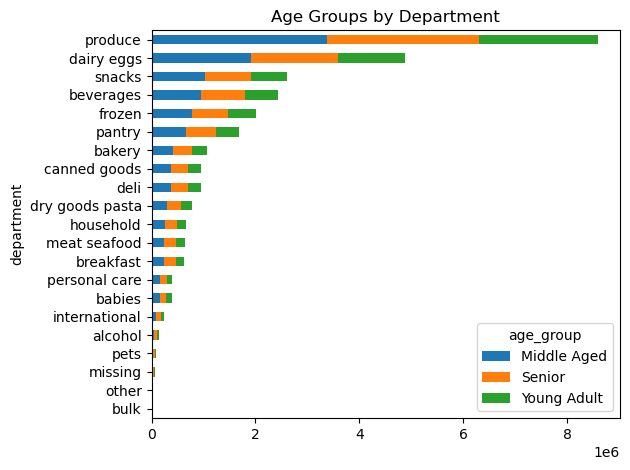

In [85]:
# Creating visualization 
age_department_viz = age_group_dept_crosstab.plot.barh(stacked=True)
plt.title('Age Groups by Department')
plt.tight_layout()

In [86]:
# Exporting Visual
age_department_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_by_dept.png'))

In [166]:
# Creating Crosstab between age group and spending flag 
age_group_spending_crosstab = pd.crosstab(df_final_dept['age_group'], df_final_dept['spending_flag'], dropna = False)
age_group_spending_crosstab

spending_flag,High Spender,Low Spender
age_group,,
Middle Aged,233451,11260162
Senior,190757,9806654
Young Adult,137518,7637852


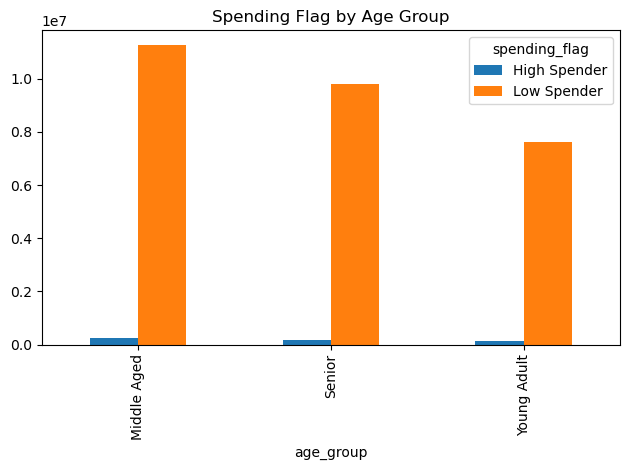

In [167]:
# Creating a Visualization 
age_group_spending = age_group_spending_crosstab.plot.bar()
plt.title('Spending Flag by Age Group')
plt.tight_layout()

In [168]:
# Exporting Visualization 
age_group_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_spending.png'))

In [183]:
# Creating a crosstab between age group and frequency tag 
age_group_frequency_crosstab = pd.crosstab(df_final_dept['age_group'], df_final_dept['frequency_tag'], dropna=False)
age_group_frequency_crosstab

frequency_tag,Frequent Customer,Non-frequent Customer,Regular Customer
age_group,,,
Middle Aged,7863971,1082373,2547269
Senior,6855618,933231,2208562
Young Adult,5304547,726075,1744748


In [184]:
# Sorting Crosstab 
age_group_frequency_crosstab = age_group_frequency_crosstab.sort_values(by='Regular Customer', ascending = False)

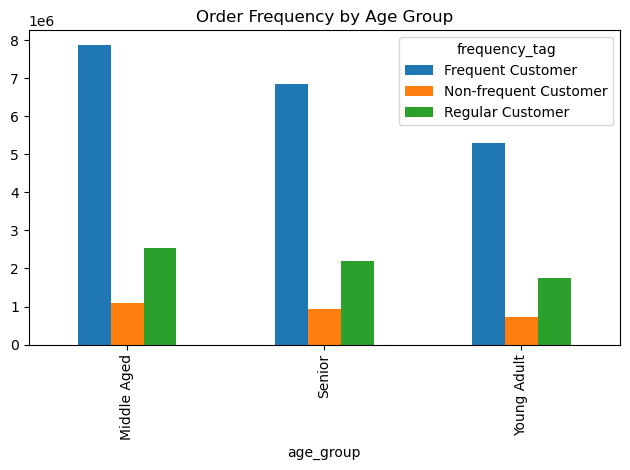

In [187]:
# Creating Visualization 
age_group_frequency = age_group_frequency_crosstab.plot.bar()
plt.title('Order Frequency by Age Group')
plt.tight_layout()

In [188]:
# Exporting Visualization 
age_group_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_group_frequency.png'))

## 04 Creating Income Profiles

In [21]:
# Finding distribution of income 
df_final_dept['income'].describe()

count    2.926639e+07
mean     9.967654e+04
std      4.309931e+04
min      2.590300e+04
25%      6.735800e+04
50%      9.675500e+04
75%      1.281240e+05
max      5.939010e+05
Name: income, dtype: float64

In [22]:
# Creating profiles based on the income segments above
df_final_dept.loc[df_final_dept['income'] >  1.281240e+05, 'income_group'] = 'High Income'
df_final_dept.loc[(df_final_dept['income'] >=6.735800e+04) & (df_final_dept['income'] <= 1.281240e+05), 'income_group'] = 'Average Income'
df_final_dept.loc[df_final_dept['income'] < 6.735800e+04, 'income_group'] = 'Low Income'

In [23]:
df_final_dept['income_group'].value_counts()

Average Income    14633266
High Income        7316573
Low Income         7316555
Name: income_group, dtype: int64

### 04a Create an appropriate visualization to show the distribution of profiles

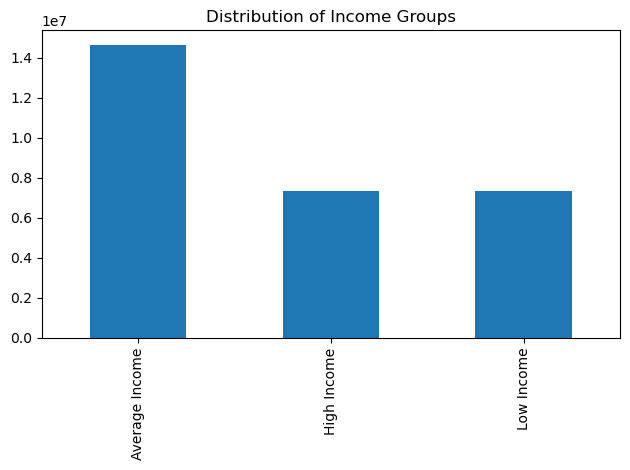

In [80]:
income_group_viz = df_final_dept['income_group'].value_counts().plot.bar()
plt.title('Distribution of Income Groups')
plt.tight_layout()

In [87]:
# Export Visualization 
income_group_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_distribution.png'))

### 04b Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [25]:
income_group_stats = df_final_dept.groupby('income_group').agg({'days_since_prior_order' : ['max', 'min', 'mean'], 'prices' :['max', 'min', 'mean']})
income_group_stats

days_since_prior_order                 prices               
                                  max  min       mean    max  min      mean
income_group                                                               
Average Income                   30.0  0.0  10.768800   25.0  1.0  7.955989
High Income                      30.0  0.0  10.759574   25.0  1.0  7.950187
Low Income                       30.0  0.0  10.972464   25.0  1.0  7.304103

### 04c Compare your customer profiles with regions and departments.

In [26]:
# Creating a Crosstab of Income Group and Region 
income_region_crosstab = pd.crosstab(df_final_dept['region'], df_final_dept['income_group'], dropna = False)
income_region_crosstab

income_group,Average Income,High Income,Low Income
region,,,
Midwest,3421968,1748695,1688033
Northeast,2580238,1302627,1294415
South,4889664,2400368,2455338
West,3741396,1864883,1878769


In [27]:
# Sorting for clarity 
income_region_crosstab = income_region_crosstab.sort_values(by=['Average Income'], ascending=False)

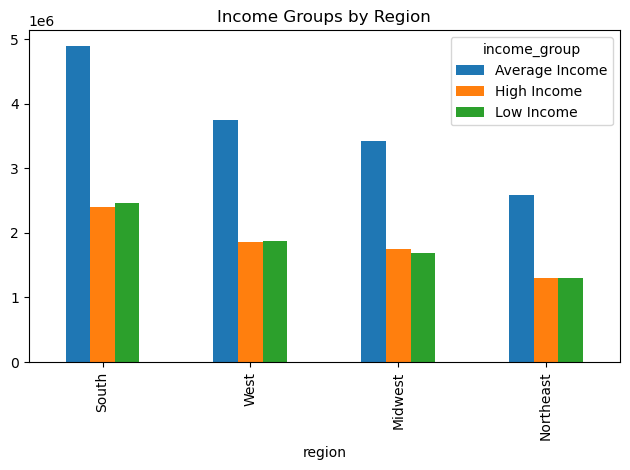

In [88]:
# Creating a visualization 
income_region_viz = income_region_crosstab.plot.bar()
plt.title('Income Groups by Region')
plt.tight_layout()

In [89]:
# Export Visualization 
income_region_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_by_region.png'))

In [29]:
# Creatingn a crosstab to income profile by department 
income_department_crosstab = pd.crosstab(df_final_dept['department'], df_final_dept['income_group'], dropna = False)
income_department_crosstab

income_group,Average Income,High Income,Low Income
department,,,
alcohol,64561,38427,34954
babies,209634,100538,77567
bakery,534906,274785,250135
beverages,1143611,583983,703063
breakfast,301981,153882,176892
bulk,15425,7122,9013
canned goods,495092,251157,210583
dairy eggs,2488210,1239251,1160135
deli,476295,237717,234787


In [30]:
# Sorting results 
income_department_crosstab = income_department_crosstab.sort_values(by=['Average Income'], ascending=True)

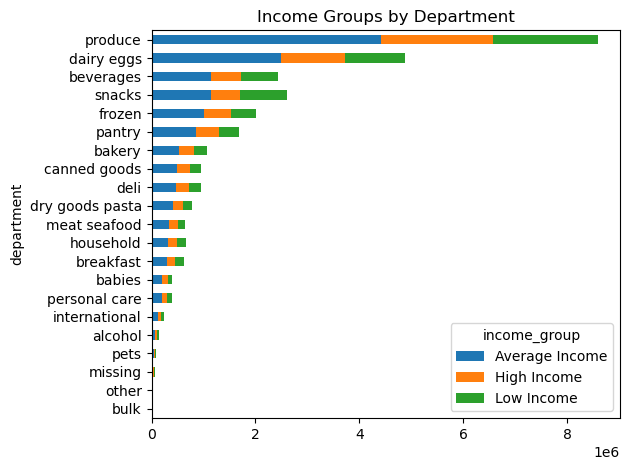

In [90]:
# Creating visualization 
income_department_viz = income_department_crosstab.plot.barh(stacked=True)
plt.title('Income Groups by Department')
plt.tight_layout()

In [91]:
# Export Visualization
income_department_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_by_department.png'))

In [169]:
# Create a crosstab between income group and spending flag 
income_spending_crosstab = pd.crosstab(df_final_dept['income_group'],df_final_dept['spending_flag'], dropna=False)
income_spending_crosstab

spending_flag,High Spender,Low Spender
income_group,,
Average Income,123594,14509672
High Income,418628,6897945
Low Income,19504,7297051


In [173]:
# Sorting crosstab 
income_spending_crosstab = income_spending_crosstab.sort_values(by='Low Spender', ascending=False)

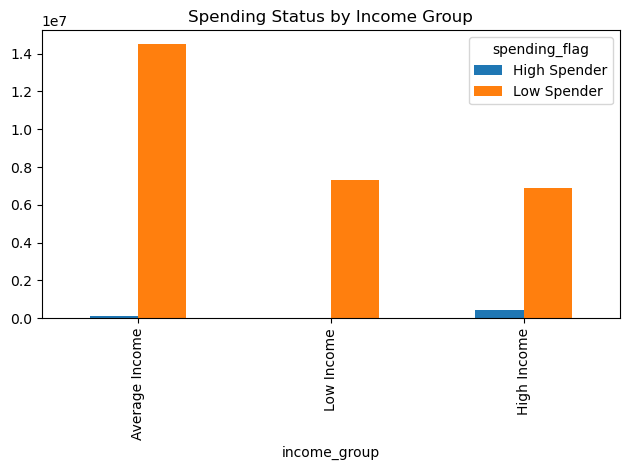

In [175]:
# Create a visualization 
income_spending = income_spending_crosstab.plot.bar()
plt.title('Spending Status by Income Group')
plt.tight_layout()

In [176]:
# Exporting Visualization 
income_spending.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_spending.png'))

In [189]:
# Creating a crosstab between age group and frequency tag 
income_frequency_crosstab = pd.crosstab(df_final_dept['income_group'], df_final_dept['frequency_tag'], dropna=False)
income_frequency_crosstab

frequency_tag,Frequent Customer,Non-frequent Customer,Regular Customer
income_group,,,
Average Income,10048654,1330556,3254056
High Income,5045211,661319,1610043
Low Income,4930271,749804,1636480


In [190]:
# Sorting result 
income_frequency_crosstab = income_frequency_crosstab.sort_values(by='Frequent Customer', ascending =False)

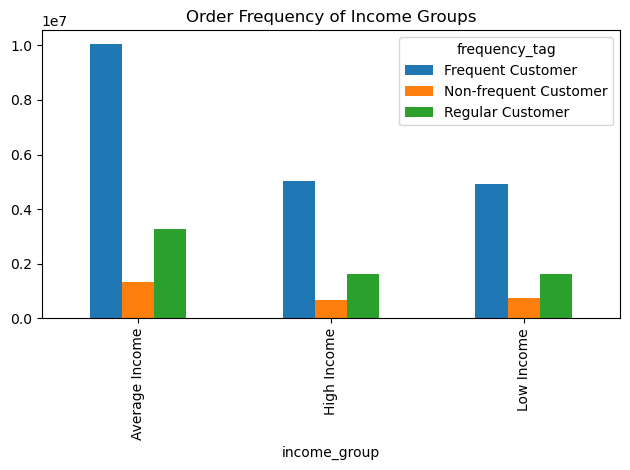

In [191]:
# Creating a visual
income_frequency = income_frequency_crosstab.plot.bar()
plt.title('Order Frequency of Income Groups')
plt.tight_layout()

In [192]:
# Exporting Visualization 
income_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_frequency.png'))

## 05 Creating Family Status Profiles 


In [32]:
# Creating a profile based off of the number of dependants and married status
df_final_dept.loc[(df_final_dept['n_dependants'] > 1) & (df_final_dept['married_status'] == 'married'), 'family_status'] = 'Married WITH Dependants'
df_final_dept.loc[(df_final_dept['n_dependants'] >= 1) & (df_final_dept['married_status'].isin(['single','divorced/widowed','living with parents and siblings'])), 'family_status'] = 'Single WITH Dependants'
df_final_dept.loc[(df_final_dept['n_dependants'] == 1) & (df_final_dept['married_status'] == 'married'), 'family_status'] = 'Married WITHOUT Dependants'
df_final_dept.loc[(df_final_dept['n_dependants'] == 0) & (df_final_dept['married_status'].isin(['single','divorced/widowed', 'living with parents and siblings'])),'family_status'] = 'Single WITHOUT Dependants'                                                        

In [33]:
df_final_dept['family_status'].value_counts()

Married WITH Dependants       13736621
Single WITHOUT Dependants      7311397
Married WITHOUT Dependants     6813425
Single WITH Dependants         1404951
Name: family_status, dtype: int64

### 05a Create an appropriate visualization to show the distribution of profiles

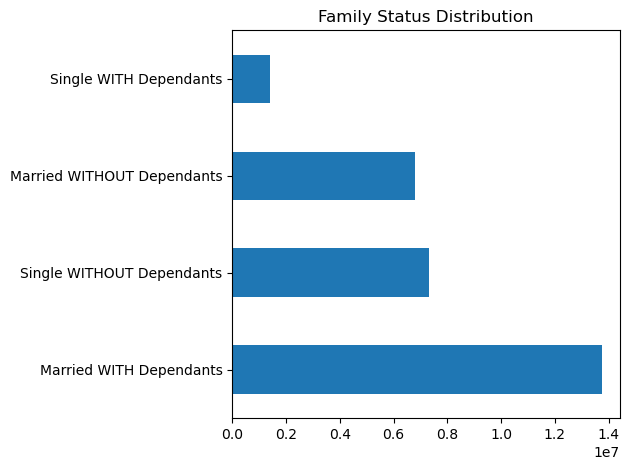

In [93]:
family_status_dist_vis = df_final_dept['family_status'].value_counts().plot.barh()
plt.title('Family Status Distribution')
family_status_dist_vis
plt.tight_layout()

In [94]:
# Export Visual
family_status_dist_vis.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_distribution.png'))

### 05b Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [35]:
family_status_stats = df_final_dept.groupby('family_status').agg({'days_since_prior_order' : ['max', 'min', 'mean'], 'prices' :['max', 'min', 'mean']})
family_status_stats

days_since_prior_order                 prices       \
                                              max  min       mean    max  min   
family_status                                                                   
Married WITH Dependants                      30.0  0.0  10.828609   25.0  1.0   
Married WITHOUT Dependants                   30.0  0.0  10.830554   25.0  1.0   
Single WITH Dependants                       30.0  0.0  10.752161   25.0  1.0   
Single WITHOUT Dependants                    30.0  0.0  10.796300   25.0  1.0   

                                      
                                mean  
family_status                         
Married WITH Dependants     7.788387  
Married WITHOUT Dependants  7.797241  
Single WITH Dependants      7.806771  
Single WITHOUT Dependants   7.789337

### 05c Compare your customer profiles with regions and departments.

In [36]:
# Creating a Crosstab to show family Status with region 
family_region_crosstab = pd.crosstab(df_final_dept['region'], df_final_dept['family_status'], dropna = False)
family_region_crosstab

family_status,Married WITH Dependants,Married WITHOUT Dependants,Single WITH Dependants,Single WITHOUT Dependants
region,,,,
Midwest,3171416,1630777,329990,1726513
Northeast,2434178,1219469,243879,1279754
South,4598818,2232304,481532,2432716
West,3532209,1730875,349550,1872414


In [37]:
# sorting results
family_region_crosstab = family_region_crosstab.sort_values(by=['Married WITH Dependants'], ascending=True)

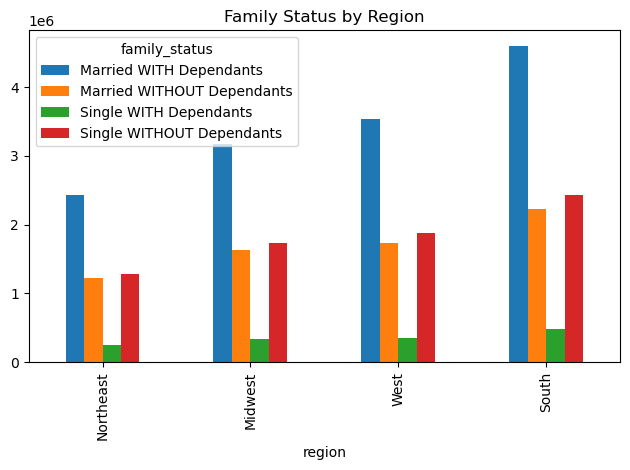

In [95]:
# Creating a visualization for above table 
family_region_viz = family_region_crosstab.plot.bar()
plt.title('Family Status by Region')
plt.tight_layout()

In [96]:
# Export Visual
family_region_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_by_region.png'))

In [39]:
# Creating a Crosstab with Family status and department 
family_department_crosstab = pd.crosstab(df_final_dept['department'], df_final_dept['family_status'], dropna = False)
family_department_crosstab

family_status,Married WITH Dependants,Married WITHOUT Dependants,Single WITH Dependants,Single WITHOUT Dependants
department,,,,
alcohol,62959,31569,8222,35192
babies,184692,87111,18233,97703
bakery,495102,247347,50998,266379
beverages,1141370,564909,114034,610344
breakfast,294939,148992,31330,157494
bulk,14962,7523,1525,7550
canned goods,450065,223409,45977,237381
dairy eggs,2286598,1144109,236560,1220329
deli,445651,218688,45412,239048


In [40]:
# Sorting Results 
family_department_crosstab = family_department_crosstab.sort_values(by='Married WITH Dependants', ascending = True)

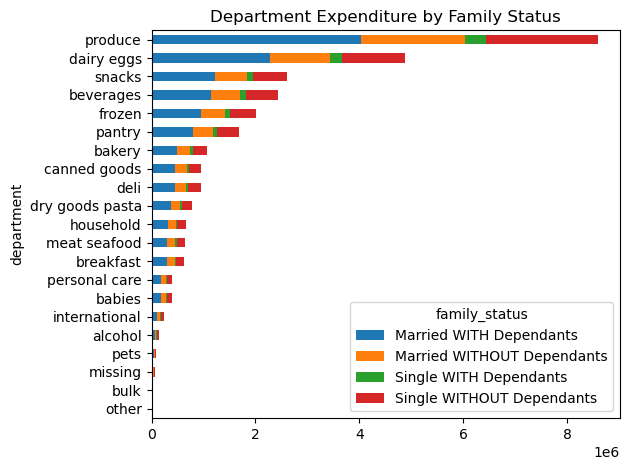

In [98]:
# Creating a visualization 
family_department_viz = family_department_crosstab.plot.barh(stacked = True)
plt.title('Department Expenditure by Family Status')
plt.tight_layout()

In [99]:
# Export Visualization 
family_department_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_by_dept.png'))

In [157]:
# Creating a Crosstab between family status and spending tag 
family_spending_crosstab = pd.crosstab(df_final_dept['family_status'],df_final_dept['spending_flag'], dropna=False)
family_spending_crosstab

spending_flag,High Spender,Low Spender
family_status,,
Married WITH Dependants,274486,13462135
Married WITHOUT Dependants,122162,6691263
Single WITH Dependants,26467,1378484
Single WITHOUT Dependants,138611,7172786


In [160]:
# Sorting results 
family_spending_crosstab = family_spending_crosstab.sort_values(by='High Spender', ascending = False)

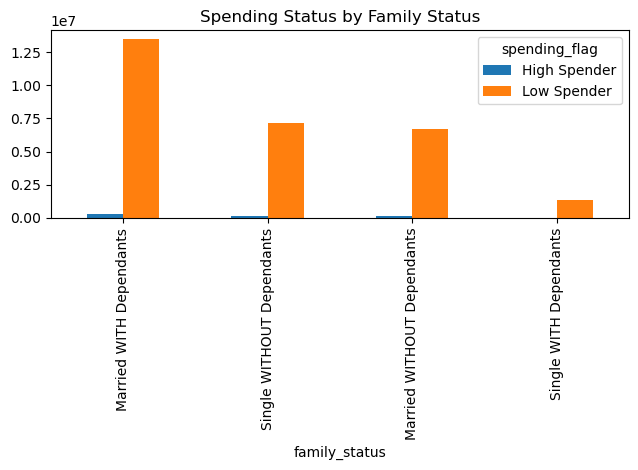

In [163]:
# Creating a Visualization 
family_spending_viz = family_spending_crosstab.plot.bar()
plt.title('Spending Status by Family Status')
plt.tight_layout()

In [165]:
# Exporting Visualization 
family_spending_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_spending.png'))

In [193]:
# Creating a crosstab between family status and frequency tag 
family_frequency_crosstab = pd.crosstab(df_final_dept['family_status'], df_final_dept['frequency_tag'], dropna=False)
family_frequency_crosstab

frequency_tag,Frequent Customer,Non-frequent Customer,Regular Customer
family_status,,,
Married WITH Dependants,9393851,1277597,3065173
Married WITHOUT Dependants,4664332,654407,1494686
Single WITH Dependants,976755,131526,296670
Single WITHOUT Dependants,4989198,678149,1644050


In [194]:
# Sorting results 
family_frequency_crosstab = family_frequency_crosstab.sort_values(by='Frequent Customer', ascending=False)

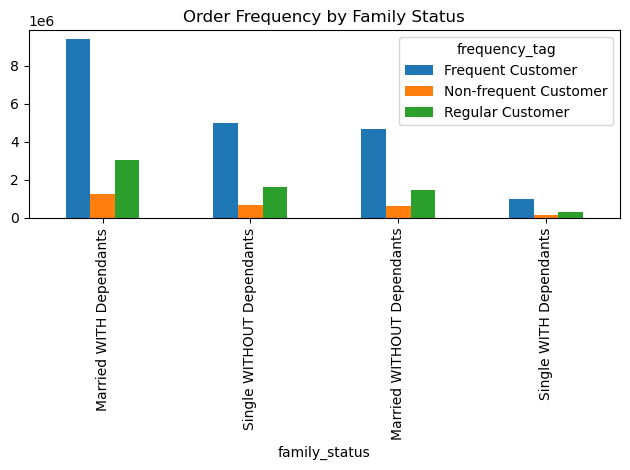

In [195]:
# Creating Visualization 
family_frequency = family_frequency_crosstab.plot.bar()
plt.title('Order Frequency by Family Status')
plt.tight_layout()

In [197]:
# Exporting Visualization 
family_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_frequency.png'))

## 06 Creating Department Consumption Profile 


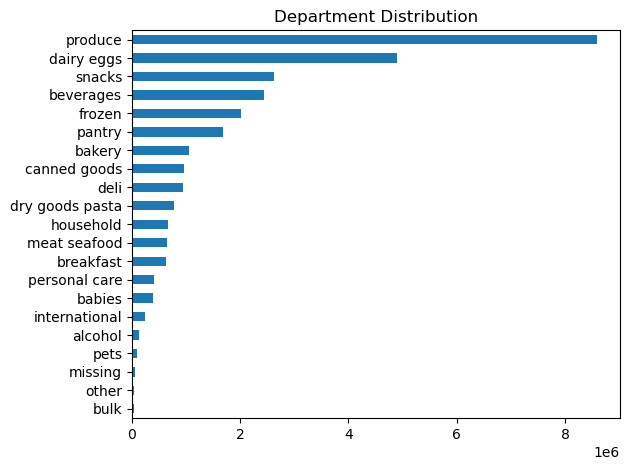

In [131]:
# Creating visualization of distribution of departments
dept_distribution_viz = df_final_dept['department'].value_counts().sort_values(ascending=True).plot.barh()
plt.title('Department Distribution')
plt.tight_layout()

In [132]:
# Exporting Visualization 
dept_distribution_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_distribution.png'))

In [43]:
# Creating a profile based on specific department consumption of frozen goods 
df_final_dept.loc[df_final_dept['department'] == 'frozen', 'frozen_customer'] = 'Frozen Consumer'
df_final_dept.loc[df_final_dept['department'] != 'frozen', 'frozen_customer'] = 'Non-Frozen Consumer'

In [44]:
# Need to include the user_id column to identify unique customers who consumer frozen foods 
frozen_customer_updated = df_final_dept.loc[df_final_dept['frozen_customer'] == 'Frozen Consumer', 'user_id'].unique()

In [45]:
# Updating the "frozen_customer" column
df_final_dept.loc[df_final_dept['user_id'].isin(frozen_customer_updated), 'frozen_customer'] = 'Frozen Consumer'

In [46]:
# Checking frequency of the frozen customer column
df_final_dept['frozen_customer'].value_counts()

Frozen Consumer        27300456
Non-Frozen Consumer     1965938
Name: frozen_customer, dtype: int64

### 06a Create an appropriate visualization to show the distribution of profiles

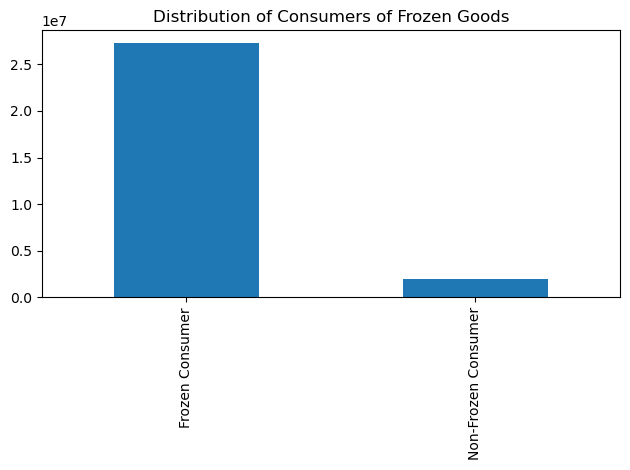

In [102]:
# Creating a visualization of the distribution 
frozen_distribution_viz = df_final_dept['frozen_customer'].value_counts().plot.bar()
plt.title('Distribution of Consumers of Frozen Goods')
plt.tight_layout()

In [103]:
# Export Visualization 
frozen_distribution_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frozen_distribution.png'))

### 06b Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [48]:
frozen_customer_stats = df_final_dept.groupby('frozen_customer').agg({'days_since_prior_order' : ['max', 'min', 'mean'], 'prices' :['max', 'min', 'mean']})
frozen_customer_stats

days_since_prior_order                 prices       \
                                       max  min       mean    max  min   
frozen_customer                                                          
Frozen Consumer                       30.0  0.0  10.712142   25.0  1.0   
Non-Frozen Consumer                   30.0  0.0  12.317266   25.0  1.0   

                               
                         mean  
frozen_customer                
Frozen Consumer      7.813226  
Non-Frozen Consumer  7.490817

### 06c Compare your customer profiles with regions and departments.

In [49]:
# Creating a crosstab with Frozen Customers and Region 
frozen_region_crosstab = pd.crosstab(df_final_dept['region'], df_final_dept['frozen_customer'], dropna = False)
frozen_region_crosstab

frozen_customer,Frozen Consumer,Non-Frozen Consumer
region,,
Midwest,6407341,451355
Northeast,4833353,343927
South,9092324,653046
West,6967438,517610


In [50]:
# Sorting results 
frozen_region_crosstab = frozen_region_crosstab.sort_values(by='Frozen Consumer')

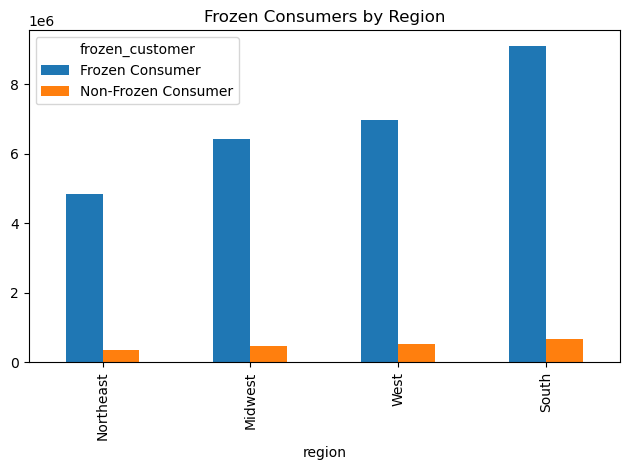

In [104]:
# Creating visualization of crosstab above 
frozen_region_viz = frozen_region_crosstab.plot.bar()
plt.title('Frozen Consumers by Region')
plt.tight_layout()

In [105]:
# Export the visualization 
frozen_region_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frozen_cust_by_region.png'))

In [52]:
# Creating a crosstab to show frozen consumers by department 
frozen_department_crosstab = pd.crosstab(df_final_dept['department'], df_final_dept['frozen_customer'], dropna = False)
frozen_department_crosstab

frozen_customer,Frozen Consumer,Non-Frozen Consumer
department,,
alcohol,113630,24312
babies,375814,11925
bakery,1005833,53993
beverages,2147893,282764
breakfast,580111,52644
bulk,28808,2752
canned goods,919080,37752
dairy eggs,4546518,341078
deli,896980,51819


In [53]:
# Sorting crosstab 
frozen_department_crosstab = frozen_department_crosstab.sort_values(by='Frozen Consumer')

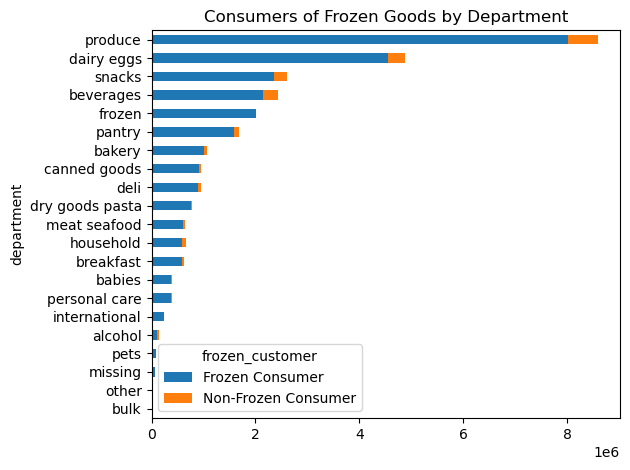

In [106]:
# Creating a visualization of crosstab 
frozen_department_viz = frozen_department_crosstab.plot.barh(stacked=True)
plt.title('Consumers of Frozen Goods by Department')
plt.tight_layout()

In [107]:
# Export visualization 
frozen_department_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'frozen_by_dept.png'))

## 07 The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders

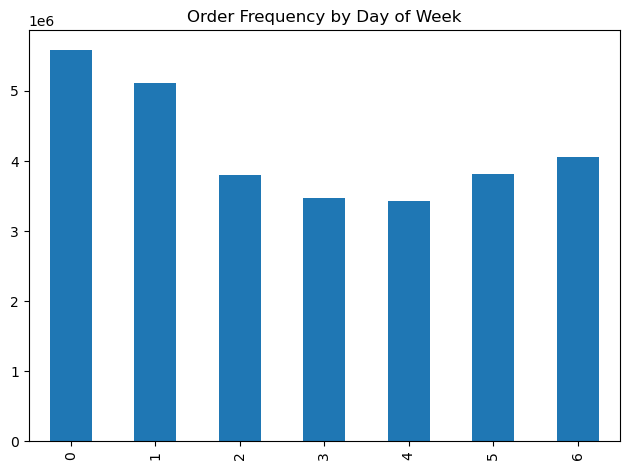

In [108]:
ords_by_day_bar = df_final_dept['order_day_of_week'].value_counts().sort_index().plot.bar()
plt.title('Order Frequency by Day of Week')
plt.tight_layout()

In [109]:
# Exporting visualization 
ords_by_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ords_by_day.png'))

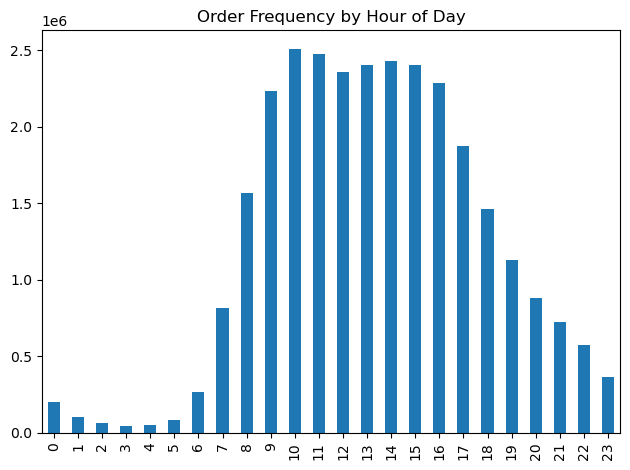

In [110]:
ords_by_hour = df_final_dept['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Order Frequency by Hour of Day')
plt.tight_layout()

In [111]:
# Exporting visualization 
ords_by_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ords_by_hour.png'))

## 08 Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts

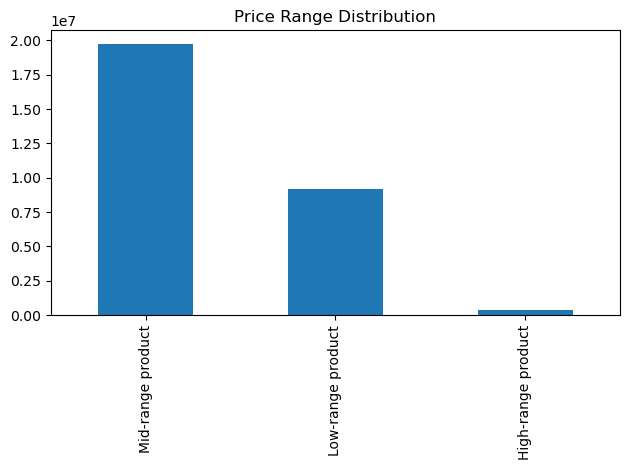

In [112]:
price_range_frequency = df_final_dept['price_range'].value_counts().plot.bar()
plt.title('Price Range Distribution')
plt.tight_layout()

In [113]:
# Exporting Visualization 
price_range_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_frequency.png'))

## 09 What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

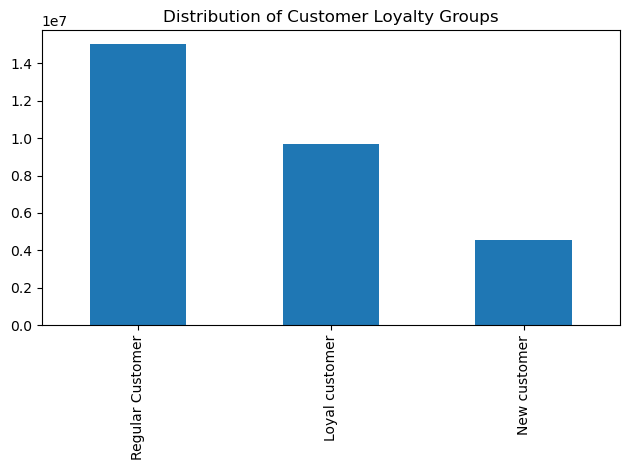

In [114]:
loyalty_distribution = df_final_dept['loyalty_flag'].value_counts().plot.bar()
plt.title('Distribution of Customer Loyalty Groups')
plt.tight_layout()

In [115]:
# Exporting Visualization 
loyalty_distribution.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_dist.png'))

## 10 Are there differences in ordering habits based on a customer’s loyalty status?

In [63]:
# Creating a crosstab based on Loyalty Status and Day of Week 
loyalty_day_of_week_crosstab = pd.crosstab(df_final_dept['order_day_of_week'], df_final_dept['loyalty_flag'], dropna = False)
loyalty_day_of_week_crosstab

loyalty_flag,Loyal customer,New customer,Regular Customer
order_day_of_week,,,
0,1656634,931074,2997231
1,1743623,774487,2601424
2,1276185,590788,1937812
3,1192673,529518,1743701
4,1218359,505730,1700932
5,1375086,557832,1880163
6,1243631,653081,2156430


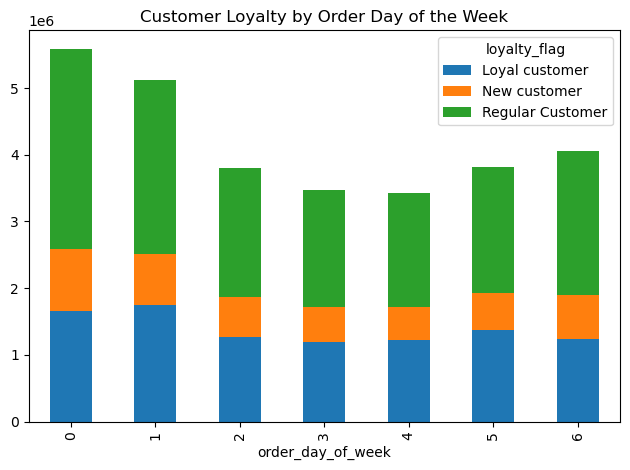

In [116]:
# Creating a Visualization 
loyalty_day_of_week = loyalty_day_of_week_crosstab.plot.bar(stacked=True)
plt.title('Customer Loyalty by Order Day of the Week')
plt.tight_layout()

In [117]:
# Exporting visualization 
loyalty_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_day_of_week.png'))

In [66]:
# Creating a crosstab based on Loyalty Status and Hour of Day  
loyalty_hour_of_day_crosstab = pd.crosstab(df_final_dept['order_hour_of_day'], df_final_dept['loyalty_flag'], dropna = False)
loyalty_hour_of_day_crosstab

loyalty_flag,Loyal customer,New customer,Regular Customer
order_hour_of_day,,,
0,58236,33578,104653
1,28708,19707,55041
2,16600,11709,33354
3,12195,8955,24246
4,15618,7721,23729
5,28082,11710,40056
6,106196,32040,127753
7,326297,96664,392165
8,607915,197176,763030


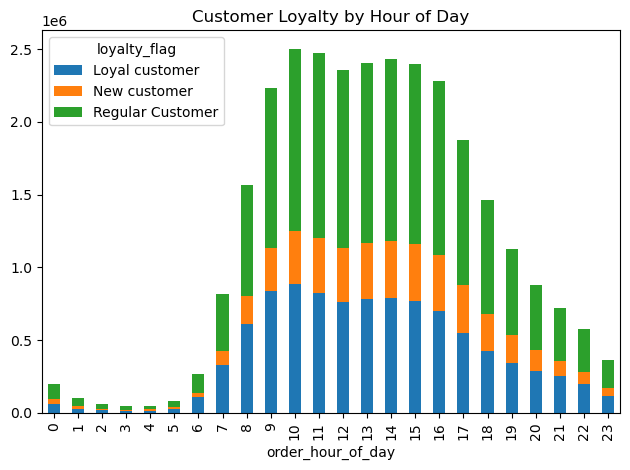

In [118]:
# Creating a visualization 
loyalty_hour_of_day = loyalty_hour_of_day_crosstab.plot.bar(stacked=True)
plt.title('Customer Loyalty by Hour of Day')
plt.tight_layout()

In [119]:
# Exporting Visualization 
loyalty_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_hour_of_day.png'))

In [177]:
# Creating a crosstab based on Loyalty Status and Spending Flag 
loyalty_spender_crosstab = pd.crosstab(df_final_dept['loyalty_flag'], df_final_dept['spending_flag'], dropna = False)
loyalty_spender_crosstab

spending_flag,High Spender,Low Spender
loyalty_flag,,
Loyal customer,199286,9506905
New customer,78455,4464055
Regular Customer,283985,14733708


In [179]:
# Sorting Crosstab 
loyalty_spender_crosstab = loyalty_spender_crosstab.sort_values(by='Low Spender', ascending = False)

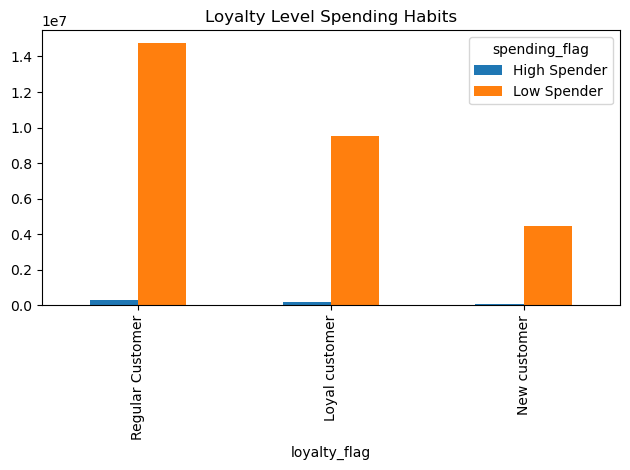

In [180]:
# Creating a Visualiation 
loyalty_spender_viz = loyalty_spender_crosstab.plot.bar()
plt.title('Loyalty Level Spending Habits')
plt.tight_layout()

In [181]:
# Exporting Visualization 
loyalty_spender_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_spending.png'))

## 11 Are there differences in ordering habits based on a customer’s region?

In [69]:
# Creating a crosstab between region and order day of the week 
region_day_of_week_crosstab = pd.crosstab(df_final_dept['order_day_of_week'], df_final_dept['region'], dropna = False)
region_day_of_week_crosstab

region,Midwest,Northeast,South,West
order_day_of_week,,,,
0,1312406,989978,1847101,1435454
1,1194778,904279,1710494,1309983
2,895118,675844,1266115,967708
3,808469,615364,1159427,882632
4,804568,604236,1137921,878296
5,891341,677063,1271689,972988
6,952016,710516,1352623,1037987


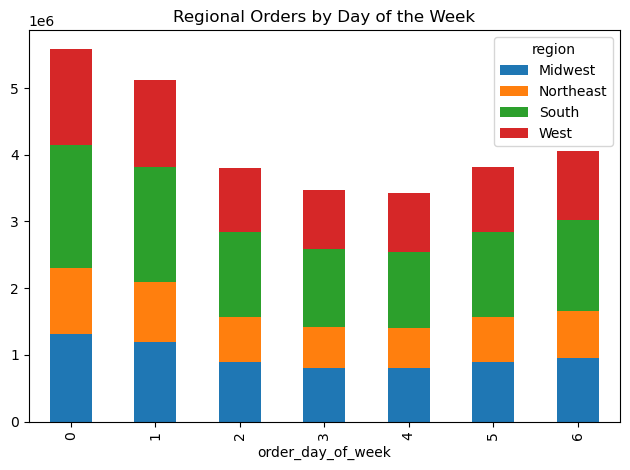

In [120]:
# Creating a visualization 
region_day_of_week = region_day_of_week_crosstab.plot.bar(stacked=True)
plt.title('Regional Orders by Day of the Week')
plt.tight_layout()

In [122]:
# Exporting visualization 
region_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_day_of_week.png'))

In [72]:
# Creating a crosstab between region and hour of the day 
region_hour_crosstab = pd.crosstab(df_final_dept['order_hour_of_day'], df_final_dept['region'], dropna = False)
region_hour_crosstab

region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,45543,34598,66032,50294
1,24381,19591,33769,25715
2,15147,11072,19288,16156
3,10393,8252,15160,11591
4,11169,8419,15850,11630
5,17974,13830,28229,19815
6,61455,46920,90375,67239
7,190407,145353,272849,206517
8,362619,277978,529644,397880


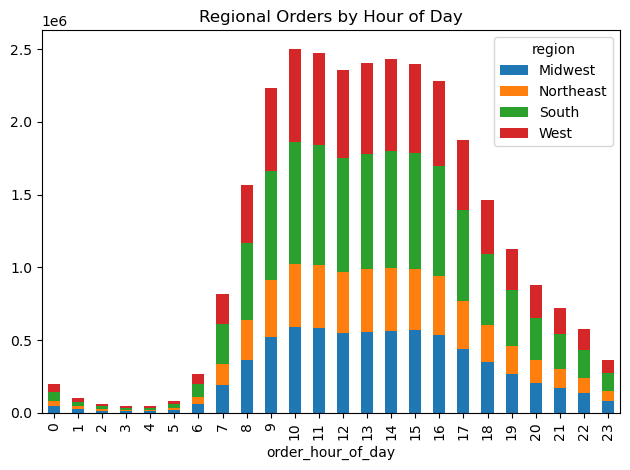

In [123]:
# Creating a visualization 
region_hour = region_hour_crosstab.plot.bar(stacked=True)
plt.title('Regional Orders by Hour of Day')
plt.tight_layout()

In [124]:
# Exporting Visualization 
region_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_hour.png'))

In [139]:
# Creating a crosstab for region and spending flag 
region_spending_crosstab = pd.crosstab(df_final_dept['region'], df_final_dept['spending_flag'], dropna = False)
region_spending_crosstab

spending_flag,High Spender,Low Spender
region,,
Midwest,141800,6716896
Northeast,95836,5081444
South,185037,9560333
West,139053,7345995


In [153]:
# Sorting results 
region_spending_crosstab = region_spending_crosstab.sort_values(by='Low Spender',ascending = False)

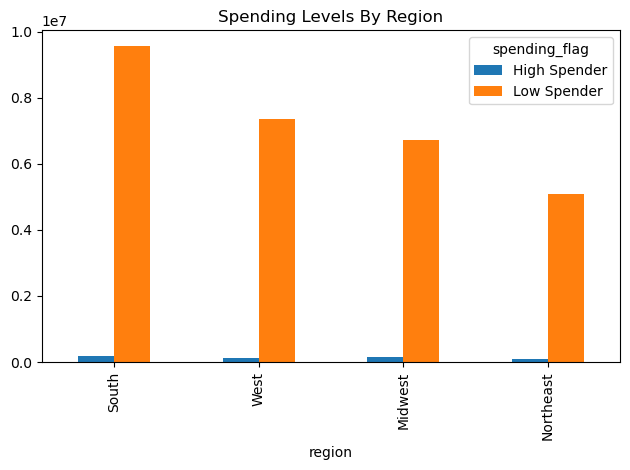

In [155]:
region_spending_viz = region_spending_crosstab.plot.bar()
plt.title('Spending Levels By Region')
plt.tight_layout()

In [156]:
# Export visualization 
region_spending_viz.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spending.png'))